In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# load the training data
import os
from PIL import Image
import numpy as np

train_data_path = '/content/drive/MyDrive/Colab Notebooks/ML lab/Lab4/data/train'
folders = os.listdir(train_data_path)
folders.sort(key=int)
x_train = []
y_train = []
category_count = [0]*65
for folder in folders:
  subpath = train_data_path +'/'+folder
  files = os.listdir(subpath)
  for file in files:
    filepath = subpath + '/' + file
    img = Image.open(filepath)  
    # transform the image to matrix
    pixels = np.array(img)
    x_train.append(pixels)
    y_train.append(int(folder))
    category_count[int(folder)]+=1



x_train = np.array(x_train)
nsamples, nrows, ncols = x_train.shape
x_train = x_train.reshape((nsamples, nrows*ncols))
print(x_train.shape)

(15954, 400)


In [3]:
# load the test data
test_data_path = '/content/drive/MyDrive/Colab Notebooks/ML lab/Lab4/data/test'
folders = os.listdir(test_data_path)
folders.sort(key=int)

x_test = []
y_test = []
for folder in folders:
  subpath = test_data_path +'/'+folder
  files = os.listdir(subpath)
  for file in files:
    filepath = subpath + '/' + file
    img = Image.open(filepath)  
    pixels = np.array(img)
    x_test.append(pixels)
    y_test.append(int(folder))

x_test = np.array(x_test)
nsamples, nrows, ncols = x_test.shape
x_test = x_test.reshape((nsamples, nrows*ncols))
print(x_test.shape)

(4665, 400)


In [4]:
# use library's knn classifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='kd_tree', n_neighbors = 3)
knn.fit(x_train, y_train)
p_test = knn.predict(x_test)
print(accuracy_score(y_test, p_test))

0.69989281886388


In [5]:
# use KDTree
from sklearn.neighbors import KDTree

kdtree = KDTree(x_train, leaf_size = 40)
dist, indices = kdtree.query(x_test, k=3)
print(indices[0])
print(dist[0])

[9608 9394 9267]
[2273.17839159 2289.29880094 2314.13115445]


In [6]:
y_test = np.array(y_test)
y_train = np.array(y_train)
print(y_train[indices[0]])

[13 12 12]


In [7]:
from sklearn.metrics.pairwise import euclidean_distances

X = [[[1,1],[1,1]],[[0,0],[0,0]]]
Y = [[[0,0],[0,0]]]
X = np.array(X)
nsamples, nrows, ncols = X.shape
X = X.reshape((nsamples, nrows*ncols))
print(X)
Y = np.array(Y)
nsamples, nrows, ncols = Y.shape
Y = Y.reshape((nsamples, nrows*ncols))
print(Y)
euclidean_distances(X,Y)

[[1 1 1 1]
 [0 0 0 0]]
[[0 0 0 0]]


array([[2.],
       [0.]])

In [8]:
# use KD-tree to build the model
# this is nothing more than a wrapper over sklearn's KDTree
import numpy as np
from sklearn.neighbors import KDTree

class KNNClassifier(object):
  def __init__(self, n_neighbors = 3):
    self._kdtree = None
    self._labels = None
    self._n_neigbors = n_neighbors

  def fit(self, X, y):
    self._kdtree = KDTree(X)
    self._labels = np.array(y)

  def predict(self, X):
      dist, indices = self._kdtree.query(X, k = self._n_neigbors)
      pred = []
      for ind in indices: 
        votes = self._labels[ind]
        p = self._mod(votes)
        pred.append(p)
      return pred

  def _mod(self, y):
    if len(y)==1: return y[0]
    map = [0]*65
    for label in y:
      map[label]+=1
      # if this label has vote count exceeds half of the total number of votes, directly return this category
      if map[label] >=(len(y)+1)/2: return label

    return map.index(max(map))



In [9]:
# test the model
knn2 = KNNClassifier()
knn2.fit(x_train, y_train)
p_test2 = knn2.predict(x_test)
print("accuracy_score: ", accuracy_score(p_test2, y_test))

accuracy_score:  0.69989281886388


In [10]:
# find out the variation of the accuracy scores against different value of k
k = []
acc_scores = []
for K in range(1,51):
  k.append(K)
  knn = KNeighborsClassifier(n_neighbors = K)
  knn.fit(x_train, y_train)
  p_test = knn.predict(x_test)
  acc = accuracy_score(y_test, p_test)
  print("K: {}, accuracy_score: {}".format(K, acc))
  acc_scores.append(acc)


K: 1, accuracy_score: 0.7168274383708467
K: 2, accuracy_score: 0.6743837084673098
K: 3, accuracy_score: 0.69989281886388
K: 4, accuracy_score: 0.685101822079314
K: 5, accuracy_score: 0.6928188638799572
K: 6, accuracy_score: 0.6885316184351554
K: 7, accuracy_score: 0.692390139335477
K: 8, accuracy_score: 0.6855305466237942
K: 9, accuracy_score: 0.6872454448017149
K: 10, accuracy_score: 0.6831725616291533
K: 11, accuracy_score: 0.6870310825294748
K: 12, accuracy_score: 0.6799571275455519
K: 13, accuracy_score: 0.6782422293676313
K: 14, accuracy_score: 0.6754555198285102
K: 15, accuracy_score: 0.6728831725616291
K: 16, accuracy_score: 0.6694533762057878
K: 17, accuracy_score: 0.6647374062165059
K: 18, accuracy_score: 0.6651661307609861
K: 19, accuracy_score: 0.6630225080385852
K: 20, accuracy_score: 0.6615219721329046
K: 21, accuracy_score: 0.6589496248660236
K: 22, accuracy_score: 0.652518756698821
K: 23, accuracy_score: 0.6488745980707395
K: 24, accuracy_score: 0.6452304394426581
K: 25,

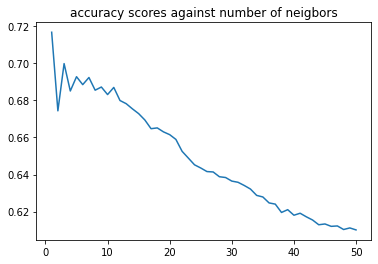

In [11]:
import matplotlib.pyplot as plt
plt.plot(k, acc_scores)
plt.title("accuracy scores against number of neigbors")
plt.show()

In [12]:
# all the valid distance metric KNN Classifier accept
print(KDTree.valid_metrics)

['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity']


In [13]:
# analyze how the different distance metric methods impact the result
acc_scores = []
distance_metrics = ['minkowski', 'euclidean', 'manhattan','chebyshev']
for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors = 3, algorithm = 'kd_tree', metric = metric)
    knn.fit(x_train, y_train)
    p_test = knn.predict(x_test)
    acc = accuracy_score(y_test, p_test)
    print(metric)
    print("accuracy_score:", acc)
    acc_scores.append(acc)


minkowski
accuracy_score: 0.69989281886388
euclidean
accuracy_score: 0.69989281886388
manhattan
accuracy_score: 0.6906752411575563
chebyshev
accuracy_score: 0.43965702036441584


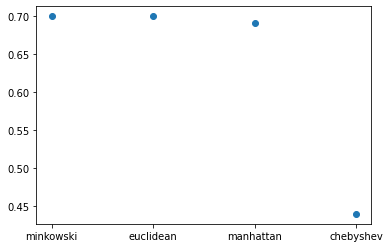

In [14]:
plt.scatter(distance_metrics, acc_scores)

In [15]:
# weight functions
# 1/d^2
def square_inverse(distances):
  distances = np.array(distances)
  return 1/np.square(distances)

# e^(-d)
def negative_exponential(distances):
  distances = np.array(distances)
  return np.exp(np.negative(distances))

# e^(-(d/sigma)^2)
def gaussian_exponential(distances):
  distances = np.array(distances)
  var = np.var(distances)
  return np.exp(np.negative(np.square(distances/var)))

kernel_functions = ['uniform', 'distance', square_inverse, negative_exponential, gaussian_exponential]

In [16]:
acc_scores = []
for kernel in kernel_functions:
    knn = KNeighborsClassifier(n_neighbors = 3, weights = kernel, algorithm = 'kd_tree')
    knn.fit(x_train, y_train)
    p_test = knn.predict(x_test)
    acc = accuracy_score(y_test, p_test)
    if isinstance(kernel, str): print(kernel)
    else: print(kernel.__name__)
    print("accuracy_score:", acc)
    acc_scores.append(acc)

uniform
accuracy_score: 0.69989281886388
distance
accuracy_score: 0.7103965702036441
square_inverse
accuracy_score: 0.7103965702036441
negative_exponential
accuracy_score: 0.0720257234726688
gaussian_exponential
accuracy_score: 0.7097534833869239


In [22]:
# different kernel width
def exponential_4(distances):
  distances = np.array(distances)
  return np.exp(np.negative(np.square(distances/4)))

def exponential_16(distances):
  distances = np.array(distances)
  return np.exp(np.negative(np.square(distances/16)))

def exponential_32(distances):
  distances = np.array(distances)
  return np.exp(np.negative(np.square(distances/32)))

def exponential_64(distances):
  distances = np.array(distances)
  return np.exp(np.negative(np.square(distances/64)))

def exponential_128(distances):
  distances = np.array(distances)
  return np.exp(np.negative(np.square(distances/128)))

def exponential_256(distances):
  distances = np.array(distances)
  return np.exp(np.negative(np.square(distances/256)))

def exponential_512(distances):
  distances = np.array(distances)
  return np.exp(np.negative(np.square(distances/512)))

def exponential_1024(distances):
  distances = np.array(distances)
  return np.exp(np.negative(np.square(distances/1024)))


kernel_width = [exponential_4, exponential_16, exponential_32, exponential_64, exponential_128, exponential_256, exponential_512, exponential_1024]

In [23]:
acc_scores = []
for w in kernel_width:
    knn = KNeighborsClassifier(n_neighbors = 3, weights = w, algorithm = 'kd_tree')
    knn.fit(x_train, y_train)
    p_test = knn.predict(x_test)
    acc = accuracy_score(y_test, p_test)
    print(w.__name__)
    print("accuracy_score:", acc)
    acc_scores.append(acc)

exponential_4
accuracy_score: 0.05359056806002144
exponential_16
accuracy_score: 0.05487674169346195
exponential_32
accuracy_score: 0.08338692390139335
exponential_64
accuracy_score: 0.6595927116827438
exponential_128
accuracy_score: 0.717470525187567
exponential_256
accuracy_score: 0.7187566988210075
exponential_512
accuracy_score: 0.7219721329046088
exponential_1024
accuracy_score: 0.7108252947481243


Text(0.5, 1.0, 'accuracy_scores against kernel width')

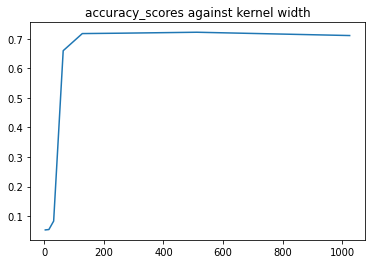

In [25]:
width = [4, 16, 32, 64, 128, 256, 512, 1024]
plt.plot(width, acc_scores)
plt.title("accuracy_scores against kernel width")

In [19]:
# change the size of the training set
from sklearn.model_selection import train_test_split
MAX_SAMPLE_SIZE = 15954
RANDOM_SEED = 2022
train_sizes = [0.01, 0.02, 0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
acc_scores3 = []
for train_size in train_sizes:
  x_train3, _, y_train3, _ = train_test_split(x_train, y_train, train_size = train_size, random_state = RANDOM_SEED)
  knn3 = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', algorithm = 'kd_tree')
  knn3.fit(x_train3, y_train3)
  p_test3 = knn3.predict(x_test)
  acc = accuracy_score(y_test, p_test3)
  print("train size:", train_size*MAX_SAMPLE_SIZE, "accuracy_score:", acc)
  acc_scores3.append(acc)

train size: 159.54 accuracy_score: 0.46709539121114685
train size: 319.08 accuracy_score: 0.4945337620578778
train size: 797.7 accuracy_score: 0.5717041800643087
train size: 1116.7800000000002 accuracy_score: 0.602357984994641
train size: 1595.4 accuracy_score: 0.6214362272240086
train size: 3190.8 accuracy_score: 0.6628081457663452
train size: 4786.2 accuracy_score: 0.6797427652733119
train size: 6381.6 accuracy_score: 0.690032154340836
train size: 7977.0 accuracy_score: 0.6934619506966774
train size: 9572.4 accuracy_score: 0.6902465166130761
train size: 11167.8 accuracy_score: 0.6941050375133977
train size: 12763.2 accuracy_score: 0.7011789924973205
train size: 14358.6 accuracy_score: 0.7071811361200429
train size: 15794.46 accuracy_score: 0.7084673097534834


Text(0.5, 1.0, 'accuracy scores against training sample size')

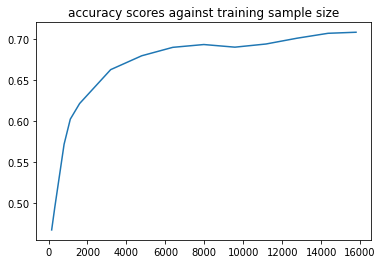

In [20]:
trainSize = [r*MAX_SAMPLE_SIZE for r in train_sizes]
plt.plot(trainSize, acc_scores3)
plt.title("accuracy scores against training sample size")